In [6]:
# Это пример выгрузки, а также обработки некоторых строковых данных и изменение типа

import pandas as pd
import matplotlib.pyplot as plt
import re

def get_num(x):
    f = re.findall(r'[0-9.,]+', x)
    return float(f[0].replace(',', ''))

def get_weight(x):
    if 'ounces' in x.lower():
        return get_num(x) * 28.3495
    if 'pounds' in x.lower():
        return get_num(x) * 453.592
    if x[-1:].lower() == 'g' or x[-5:].lower() == 'grams':
        return get_num(x)
    if 'kilograms' in x.lower():
        return get_num(x) * 1000
    return x

def get_memory(x):
    if 'gb' in x.lower():
        return get_num(x)
    if 'mb' in x.lower():
        return get_num(x) / 1024
    if 'tb' in x.lower():
        return get_num(x) * 1024
    return get_num(x)

def get_dim(x):
    if 'inches' in x.lower():
        f = re.findall(r'[0-9.,]+ x [0-9.,]+ x [0-9.,]+', x)
        return [float(y) for y in f[0].split('x')]
    return x

def get_resolution_horizontal(x):
    if 'Inches' in x:
        return None
    if '×' in x:
        x = x.replace('×', 'x')
    if 'X' in x:
        x = x.replace('X', 'x')
    f = re.findall(r'[0-9]+ x [0-9]+', x)
    if len(f) == 0:
        f = re.findall(r'[0-9]+x[0-9]+', x)
    if len(f) == 0:
        return get_num(x)
    return max([float(y) for y in f[0].split('x')])

def get_resolution_vertical(x):
    if 'Inches' in x:
        return None
    if '×' in x:
        x = x.replace('×', 'x')
    if 'X' in x:
        x = x.replace('X', 'x')
    f = re.findall(r'[0-9]+ x [0-9]+', x)
    if len(f) == 0:
        f = re.findall(r'[0-9]+x[0-9]+', x)
    if len(f) == 0:
        return None
    return min([float(y) for y in f[0].split('x')])

df = pd.read_csv('../csv_files/items_new.csv')


# in grams
df['weight'] = df['phone_weight'].apply(lambda x: None if type(x) != str else get_weight(x))

#in GB
df['mem_storage_cap'] = df['phone_mem_storage_cap'].apply(lambda x: None if type(x) != str else get_memory(x))
df['ram_memory_installed_size'] = df['phone_ram_memory_installed_size'].apply(lambda x: None if type(x) != str else get_memory(x))
df['ram'] = df['phone_ram'].apply(lambda x: None if type(x) != str else get_memory(x))

# in mm (not inches)
df['height'] = df['phone_dim'].apply(lambda x: None if type(x) != str else max(get_dim(x)) * 25.4)
df['width'] = df['phone_dim'].apply(lambda x: None if type(x) != str else (sum(get_dim(x)) - max(get_dim(x))  - min(get_dim(x)))  * 25.4)
df['depth'] = df['phone_dim'].apply(lambda x: None if type(x) != str else min(get_dim(x)) * 25.4)

# in mm (not inches)
df['standing_screen_display_size'] = df['phone_standing_screen_display_size'].apply(lambda x: None if type(x) != str else get_num(x))

# in pixels
df['resolution_horizontal'] = df['phone_scanner_res'].apply(lambda x: None if type(x) != str else get_resolution_horizontal(x))
df['resolution_vertical'] = df['phone_scanner_res'].apply(lambda x: None if type(x) != str else get_resolution_vertical(x))

df = df.drop(columns=['phone_weight', 'phone_mem_storage_cap', 'phone_ram_memory_installed_size', 'phone_ram', 'phone_dim', 'phone_standing_screen_display_size'])

df.head()

,phone_full_name,phone_review_rating,phone_rate_number,phone_list_price,phone_discount,phone_brand,phone_ASIN,phone_model_numer,phone_batteries,phone_os,...,weight,mem_storage_cap,ram_memory_installed_size,ram,height,width,depth,standing_screen_display_size,resolution_horizontal,resolution_vertical
0,Samsung Galaxy A55 5G A556E 256GB Dual-SIM GSM...,4.2,269 ratings,NaN,0%,SAMSUNG,B0CYHZ11CM,SAMSUNG A55,1 Lithium Polymer batteries required. (included),Android 14 with Samsung One UI 6.1,...,309.00955,8.0,8.0,8.0,161.036,77.470,8.128,6.60,2340.0,1080.0
1,Tracfone | Samsung Galaxy A25 5G | Locked | 12...,4.2,40 ratings,NaN,0%,Tracfone,B0CTVZCXCM,S256VL,1 Lithium Polymer batteries required. (included),Android 13.0,...,374.21340,6.0,6.0,NaN,162.052,77.470,8.128,6.50,1920.0,1080.0
2,"SAMSUNG Galaxy A16 5G Dual SIM (256GB, 8GB) 6....",3.0,1 rating,NaN,0%,SAMSUNG,B0DMTTFB2B,A166M/DS,1 Lithium Ion batteries required. (included),Android 14,...,422.40755,256.0,8.0,NaN,152.400,101.600,50.800,6.70,2340.0,1080.0
3,SAMSUNG Galaxy A14 4G LTE (128GB + 4GB) Unlock...,4.3,743 ratings,NaN,0%,SAMSUNG,B0BXVKVR98,SM-A145M/DS,1 Lithium Ion batteries required. (included),"Android 12, One UI Core 4.1",...,201.28145,128.0,4.0,4.0,166.878,77.978,8.890,6.60,2408.0,1080.0
4,Tracfone | Motorola Moto g Power 5G 2024 | Loc...,4.4,21 ratings,NaN,0%,Tracfone,B0DFHQ72M3,XT2415V,1 Lithium Polymer batteries required. (included),Android 14,...,382.71825,8.0,8.0,NaN,NaN,NaN,NaN,6.72,1920.0,1080.0


**Оценим показатеи памяти (в GB)**:

На графиках ниже модно наблюдат интересуную картину, а том, что два покзателя почти идентичны - это: `Ram и Ram Memory Installed Size`.
В интернете пишут, что отличие такое: 
`RAM` - это общее количество установленной оперативной памяти в системе. Это физическая память, которая физически установлена на сервере.
`Ram Memory Installed Size` - это фактический объем памяти, который доступен для использования системой. Этот показатель может быть меньше общего объема RAM по нескольким причинам:
1) Часть памяти зарезервирована для аппаратного обеспечения
2) Некоторые компоненты (например, видеокарты) используют часть памяти
3) Ограничения, накладываемые операционной системой
4) Особенности работы BIOS
5) Возможности материнской платы
- Например, если у вас установлено 6 ГБ RAM, система может показывать около 5.46 ГБ доступной памяти. Это нормально и объясняется тем, что часть памяти зарезервирована для работы оборудования.

- Важно отметить, что в случае значительных расхождений между этими показателями (например, если при 6 ГБ установленной памяти доступно только 2-3 ГБ), это может указывать на проблемы с системой, которые стоит проверить.

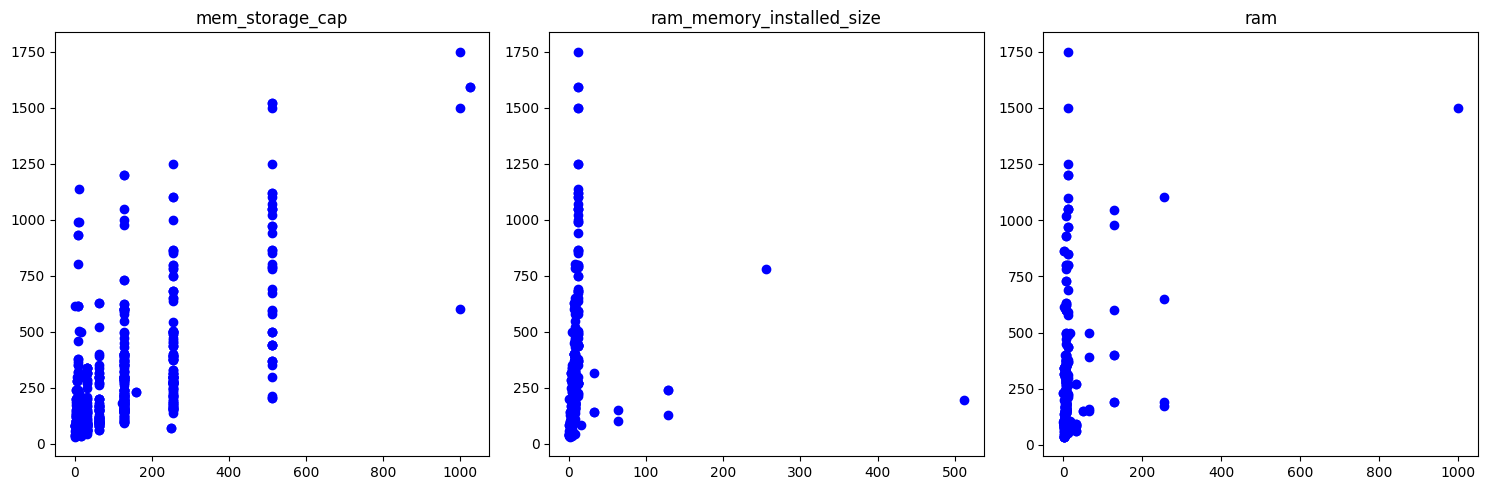

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 3, figsize=(15, 5))


ax[0].scatter(df['mem_storage_cap'], df['price'], c='b')
ax[0].set_title('mem_storage_cap')
ax[1].scatter(df['ram_memory_installed_size'], df['price'], c='b')
ax[1].set_title('ram_memory_installed_size')
ax[2].scatter(df['ram'], df['price'], c='b')
ax[2].set_title('ram')

plt.tight_layout()
plt.show()
